In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets._samples_generator import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn import svm
import pickle
import joblib

In [ ]:
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target
X_train,X_test,Y_train,Y_test = train_test_split(iris_X,iris_Y,test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

print(knn.score(X_test,Y_test))
print(knn.predict(X_test))
print(Y_test)

#交叉验证
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,iris_X,iris_Y,cv=10,scoring='accuracy')
    loss = -cross_val_score(knn,iris_X,iris_Y,cv=10,scoring='neg_mean_squared_error')
    k_scores.append(loss.mean())

print(k_scores)
plt.plot(k_range,k_scores)

In [13]:
loaded_data = datasets.load_boston()

data_X = loaded_data.data
data_Y = loaded_data.target
model = LinearRegression()
model.fit(data_X,data_Y)
print(model.coef_) #weight
print(model.intercept_) #bias

print(model.get_params()) #定义的参数
print(model.score(data_X,data_Y)) #预测吻合度 coefficient of determination

print(model.predict(data_X[:4,:]))
print(data_Y[:4])

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509001
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
0.7406426641094094
[30.00384338 25.02556238 30.56759672 28.60703649]
[24.  21.6 34.7 33.4]


D:\PythonProject\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
   

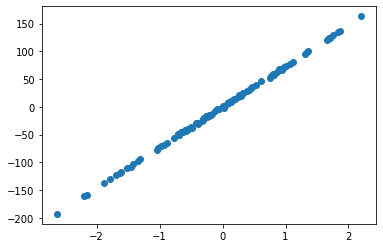

In [8]:
X,Y = datasets.make_regression(n_samples=100,n_features=1,n_targets=1,noise=1)
plt.scatter(X,Y)


In [18]:
a = np.array([[10,2.7,3.6],
              [-100,5,-2],
              [120,20,40]],dtype=np.float64)
print(preprocessing.scale(a))

[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


0.9777777777777777


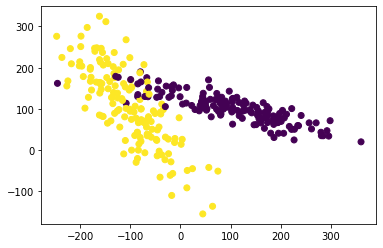

In [27]:
X,Y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,random_state=22,n_clusters_per_class=1,scale=100)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

plt.scatter(X[:,0],X[:,1],c=Y)

X = preprocessing.scale(X)
df = SVC()
df.fit(X_train,Y_train)
print(df.score(X_test,Y_test))


In [ ]:
#记录不同train_sizes下loss值
digits = load_digits()
X = digits.data
Y = digits.target
train_sizes,train_loss,test_loss = learning_curve(SVC(gamma=0.001),X,Y,
                                                  cv=10,scoring='neg_mean_squared_error',train_sizes=[0.1,0.25,0.5,0.75,1])


print(X,Y)
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',color='r',label = 'Training')
plt.plot(train_sizes,test_loss_mean,'o-',color='g',label = 'testing')
plt.legend()

[1.00000000e-06 8.41395142e-06 7.07945784e-05 5.95662144e-04
 5.01187234e-03]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


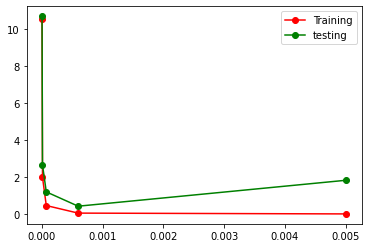

In [2]:
#寻找最优参数
digits = load_digits()
X = digits.data
Y = digits.target
#动态gamma参数
param_range = np.logspace(-6,-2.3,5)
print(param_range)
train_loss,test_loss = validation_curve(SVC(),X,Y,param_name='gamma',param_range=param_range,
                                        cv=10,scoring='neg_mean_squared_error')


print(X,Y)
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(param_range,train_loss_mean,'o-',color='r',label = 'Training')
plt.plot(param_range,test_loss_mean,'o-',color='g',label = 'testing')
plt.legend()

In [12]:
#保存model
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target

clf = svm.SVC()
clf.fit(iris_X,iris_Y)
#保存为pickel
# with open('save/clf.pickle','wb') as f: #write bytes
#     pickle.dump(clf,f)

# with open('save/clf.pickle','rb') as f: #read bytes
#     clf2 = pickle.load(f)
#     print(clf2.predict(iris_X[0:1]))

#保存为joblib  推荐
joblib.dump(clf,'save/clf.pkl')
clf3 = joblib.load('save/clf.pkl')
print(clf3.predict(iris_X[0:1]))

[0]
